In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt 
torch.manual_seed(1)

In [ ]:
dataset = datasets.MNIST(root="./data", 
                       train=True, 
                       download=True, 
                       transform=transforms.ToTensor())
loader = torch.utils.data.DataLoader(dataset=dataset, 
                                   batch_size=32, 
                                   shuffle=True) 
print(len(dataset))

60000


In [ ]:
for img, label in loader:
  print(img.shape)
  break
# -> img size is [1, 28, 28]

torch.Size([32, 1, 28, 28])


In [ ]:
class SimpleAutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128), 
        nn.ReLU(), 
        nn.Linear(128, 64) # this layer is shared bw encoder and decoder 
    )
    self.decoder = nn.Sequential(
        nn.Linear(64, 28*28), 
        # nn.ReLU(), 
        # nn.Linear(,28*28)
    )
  
  def forward(self, X):
    x = self.encoder(X)
    h = x # this line is unneccessary
    x_reconstructed = self.decoder(h)
    return x_reconstructed, h 

In [ ]:
# initialization step
model = SimpleAutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), 
    lr = 1e-3
)

Epoch  0, Loss: 0.00999512 


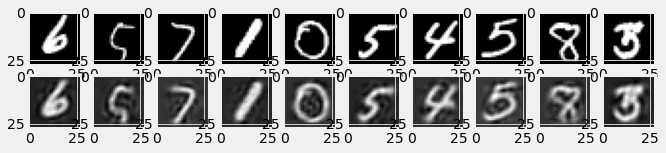

In [ ]:
epochs = 1
losses = [] 
outputs = []
representations = []
for epoch in range(epochs):
  for img, label in loader:
    # TODO: plot every first 10 image in an epoch 
    img = img.reshape(-1, 28*28)
    (reconImg, repr) = model(img)
    # print(reconImg.size())
    loss=criterion(reconImg, img)
    losses.append(loss.item())

    outputs.append(reconImg)
    representations.append(repr)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  print('Epoch {: 2}, Loss: {:10.8f} '.format(epoch, loss))


  # plot 10 image after each epoch:
  fig, ax = plt.subplots(2, 10, figsize=(10, 2))
  plot_imgs = img.detach()[0:10, :]
  plot_recon = reconImg.detach()[0:10,:]
  for idx, im in enumerate(zip(plot_imgs, plot_recon)):
    ax[0][idx].imshow(im[0].reshape(28,28), cmap='gray') 
    ax[1][idx].imshow(im[1].reshape(28,28), cmap='gray')
  plt.show( )

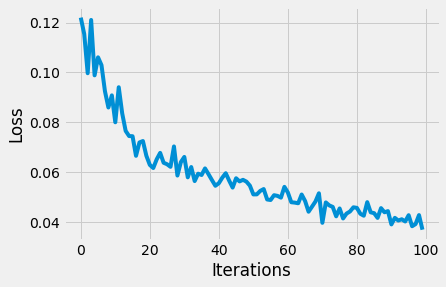

In [ ]:
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot([i for i in losses[0:100]])  

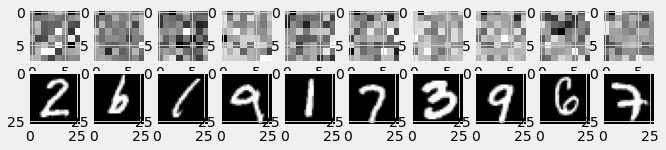

In [ ]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2))
comprs = representations[-1].detach()[:10, :]
inputs = img.detach()[:10, :]

for idx, im in enumerate(zip(comprs, inputs)):
  ax[0][idx].imshow(im[0].reshape(8,8), cmap='gray')
  ax[1][idx].imshow(im[1].reshape(28,28), cmap='gray')
plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
  i  = comprs[3, :]
  ii = i.numpy().reshape(1,-1) 
  for idx, j in enumerate(comprs):
    jj  = j.numpy().reshape(1,-1)
    # print(ii.shape)
    r =cosine_similarity(ii, jj, dense_output=True)
    print(idx, r)


0 [[-0.00934632]]
1 [[0.07358062]]
2 [[-0.11333489]]
3 [[1.]]
4 [[-0.03193325]]
5 [[0.26519012]]
6 [[0.08267523]]
7 [[0.48385173]]
8 [[0.11532006]]
9 [[0.37282073]]
